## Project 1: Monte Carlo Simulations

In [1]:
import random
import matplotlib.pyplot as plt

#### Ascending Clock Auction

In [2]:
#generates a specified number of buyers with values randomly chosen between 0 and 100, with an increment of 5.
def generate_buyers(num_buyers):
    buyers = []
    for buyer in range(num_buyers):
        buyers.append((random.randrange(0, 101, 5)))
    return buyers

In [14]:
#runs the auction recursively for each new clock price
#when the auction ends, it returns the revenue
def ascending_clock_auction(bidders, reserve, clock_increment, bid = None, current_price = None):
    
    remaining_bidders = []
    
    #at start of auction, set current price to reserve
    if bid == None:
        current_price = reserve
        
    #in each round, only keep bidders who meet the current price
    remaining_bidders = [bidder for bidder in bidders if bidder >= current_price]

    #in first round, if no one meets reserve, revenue = 0
    if bid == None and len(remaining_bidders) == 0: 
        return 0
            
    #when there is more than one bidder, save the current bid, increment current price by clock increment and recurse
    if len(remaining_bidders) > 1:
        bid = current_price
        current_price += clock_increment
        return ascending_clock_auction(remaining_bidders, reserve, clock_increment, bid, current_price)
      
    #if one bidder remains, revenue = last price with multiple bidders if that bid price meets reserve
    #if not, revenue = reserve
    elif len(remaining_bidders) == 1:
        if bid == None:
            bid = current_price
        if bid >= reserve:
            return bid
        else:
            return reserve
    
    #if no bidders remain, revenue = last bid price (last price with multiple bidders)
    else:
        return bid 

In [15]:
#runs monte carlo of ascending clock auction
def ascending_clock_Monte_Carlo(num_buyers, reserve, clock_increment, samples = 1000):
    rev_sum = 0
    for i in range(samples):
        rev_sum += ascending_clock_auction(generate_buyers(num_buyers), reserve, clock_increment)
    return(rev_sum/ samples)

In [16]:
print("\nExpected revenue with 5 buyers and $1 clock increment: ", "${:,.2f}".format(ascending_clock_Monte_Carlo(5,0,1)))
print("\nExpected revenue with 5 buyers and $10 clock increment: ", "${:,.2f}".format(ascending_clock_Monte_Carlo(5,0,10)))
print("\nExpected revenue with 20 buyers and $1 clock increment: ", "${:,.2f}".format(ascending_clock_Monte_Carlo(20,0,1)))


Expected revenue with 5 buyers and $1 clock increment:  $68.03

Expected revenue with 5 buyers and $10 clock increment:  $64.71

Expected revenue with 20 buyers and $1 clock increment:  $92.36


With the above results we can see that the having a larger clock increment (in our case, at least, changing the clock increment from 1 to 10) decreases the expected value by a small amount. This makes sense because with an ascending clock auction, the revenue will be the value of the last time multiple buyers placed a bid. Thus, if the clock increment is higher, we may have to skip back further to get the expected value. As an example, if we have 5 bidders: [20, 25, 30, 35, 40], and a clock increment of \\$1, the last time that 2 bidders bid would be at price \\$35, so the revenue would be 35. On the other hand, if we had a clock increment of $10, the last time that we would have 2 bidders is at price \\$30, so our revenue would be \\$30, slighlty less than our clock increment of \\$1.

Now, we see that with 20 buyers we get a much higher expected value than only 5 buyers. This is because with 20 buyers, we have a much higher chance that there will be buyers with higher values. When bidders have higher values, or budgets, the auction will have a higher revenue.

In [39]:
#uses monte carlo simulation function to find the expected revenue of each of the reserve prices
#returns an array of all reserve prices, array of all their respective revenues, and the optimal reserve price
def find_reserve_price():
    reserve_price_array = []
    revenue_array = []
    samples = 10000
    for reserve_price in range(0,101,5):
        reserve_price_array.append(reserve_price)
        revenue_array.append(ascending_clock_Monte_Carlo(5, reserve_price, 5, samples))
    return reserve_price_array, revenue_array, reserve_price_array[revenue_array.index(max(revenue_array))]

<BarContainer object of 21 artists>

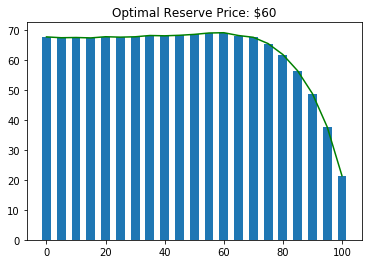

In [41]:
reserve_price_array, revenue_array, optimal_price = find_reserve_price()
plt.title("Optimal Reserve Price: $%1.d" % optimal_price)
plt.plot(reserve_price_array, revenue_array, color = 'g')
plt.bar(reserve_price_array, revenue_array, width = 3)


You can see on the above visualization that up until a reserve of \\$65, the revenues are pretty consistent, and they take a big dip after as the reserve increases. However, we can see that the optimal reserve price, although not much different than the lower reserve prices, is consistently either \\$55 and \\$60.  These generate the highest revenues.

#### Vegas Hotel Projections

In [135]:
# generates a profile for the competitor, T = total years, m = minimum years to build
def generate_competitor_profile(T, m):
    profile = [0]
    for i in range (1,T):
        #if no hotels are currently build, the next year, we always have option to build a new hotel
        if profile[-1] == 0:
            profile.append(random.randint(profile[-1], profile[-1]+1))
        else:
            #if m years have past building same hotel, we have choice to start building new hotel
            try:
                if profile[-1] == profile[-m]:
                    profile.append(random.randint(profile[-1], profile[-1]+1))
            #if it has not been m years yet, we keep building same hotel
                else:
                    profile.append(profile[-1])
            except:
                profile.append(profile[-1])
    return profile

In [136]:
#using a competitor profile, the function forcasts the profit using the giving model
def forecast_profit(competitor_profile):
    profit = 0
    for i in range(0,len(competitor_profile)):
        profit += (750 + 50*(i+1))/(competitor_profile[i]+1)  
    return profit

In [137]:
#gets all the profile options into a set so that we can randomly sample from it, 
#giving each profile option an equal chance of being picked
def get_profile_options(T,m): 
    profile_options = []
    for i in range(100000):
        profile = generate_competitor_profile(T, m)
        if profile not in profile_options:
            profile_options.append(profile)
    return profile_options

In [141]:
#uses a monte carlo simulation to get the expected profit
def expected_value_monte_carlo():
    profile_options = get_profile_options(10,2)
    total_profits = 0
    for i in range(1000):
        total_profits += forecast_profit(random.choice(profile_options))
    return(total_profits/1000)

In [142]:
print("The expected profit is", "${:,.2f}".format(expected_value_monte_carlo()))

The expected profit is $5,345.67
